# Multilabel classification of silence, biophony, rain, wind, and aircraft in soundscapes


This script is adapted from the original script used for the article :

    Grinfeder, E., Haupert, S., Ducrettet, M., Barlet, J., Reynet, M. P., Sèbe, F., & Sueur, J. (2022). Soundscape dynamics of a cold protected forest: dominance of aircraft noise. Landscape Ecology, 1-16.

## Site and recording
The audio recordings were collected in a temperate cold climax forest locally named ‘Risoux’. The forest is located in the East of France in the Jura Mountains at the Swiss border and the closest city is Morez (46° 31′ 22″ N, 6° 01′ 23″ E). The forest soundscape was recorded using four automatic SongMeter 4 recorders (Wildlife Acoustics Inc, Concord, MA, USA). These recorders were installed across the Risoux Forest central zone, along a West–East axis. The distance between the recorders was 1.00 ± 0.10 km. The position of the recorders was chosen to (1) cover the forest area, (2) sample a single habitat defined by the dominance of the European spruce, (3) avoid pseudo-replication between neighboring recorders, and (4) avoid anthropogenic noise due to car traffic and local activities 

## Supervised sound classification
In order to assess variations in the main forest soundscape components over space and time, a supervised sound classification was achieved. Five sound types were classified: aircraft (anthropophony), wind (geophony), rain (geophony), biophony, and silence (Fig. 2). Anthropophony was dominated by aircraft, as the recording sites were chosen to be distant from other human activities (ground based transportation, hiking, skiing, hunting and logging). Biophony was defined as any sound attributed to animal vocalization or movement. Silence was defined as the absence of any emergent sound. Classification was based on an artificial neural network (ANN) trained on a subsample of manually labelled sounds. The subsample contained 1% (i.e. 1314 files) of all recordings and was built to ensure a balanced dataset that is representative of (1) the four recording sites, (2) the 12 months of the year, (3) the seven week days and (4) the 24 h of a day-and-night cycle. Each recording was then listened to and manually classified as one of the five sound types by one of us (EG) using Audacity v2.3.2 (Audacity team 2019)

In [141]:
################################
# Load libraries
################################

library(tuneR)
library(seewave)
library(neuralnet)
library(pROC)
options(warn = -1)

################################
# Set constants
################################

COMPUTE_MFFC <- FALSE
DATA_PATH <- "./data/"

In [142]:
################################
# Load annotations
################################

info <- read.table(paste(DATA_PATH, "annotations.csv", sep = "/"),
                sep = ",",
                header = TRUE)
n <- nrow(info)

info

filename,model,prefix,year,month,day,hour,min,sec,date,plane,wind,rain,biophony,silence
<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
S4A03536_20180801_123000.wav,SM4,S4A03536,2018,8,1,12,30,0,8/1/2018 12:30,1,0,0,0,0
S4A03536_20180805_084500.wav,SM5,S4A03536,2018,8,5,8,45,0,8/5/2018 8:45,0,0,0,1,0
S4A03536_20180805_193000.wav,SM6,S4A03536,2018,8,5,19,30,0,8/5/2018 19:30,1,0,0,1,0
S4A03536_20180807_083000.wav,SM7,S4A03536,2018,8,7,8,30,0,8/7/2018 8:30,1,0,0,1,0
S4A03536_20180808_021500.wav,SM8,S4A03536,2018,8,8,2,15,0,8/8/2018 2:15,0,0,0,0,1
S4A03536_20180808_090000.wav,SM9,S4A03536,2018,8,8,9,0,0,8/8/2018 9:00,1,0,0,1,0
S4A03536_20180810_030000.wav,SM10,S4A03536,2018,8,10,3,0,0,8/10/2018 3:00,0,0,0,0,1
S4A03536_20180811_073000.wav,SM11,S4A03536,2018,8,11,7,30,0,8/11/2018 7:30,1,0,0,1,0
S4A03536_20180811_120000.wav,SM12,S4A03536,2018,8,11,12,0,0,8/11/2018 12:00,0,0,0,1,0


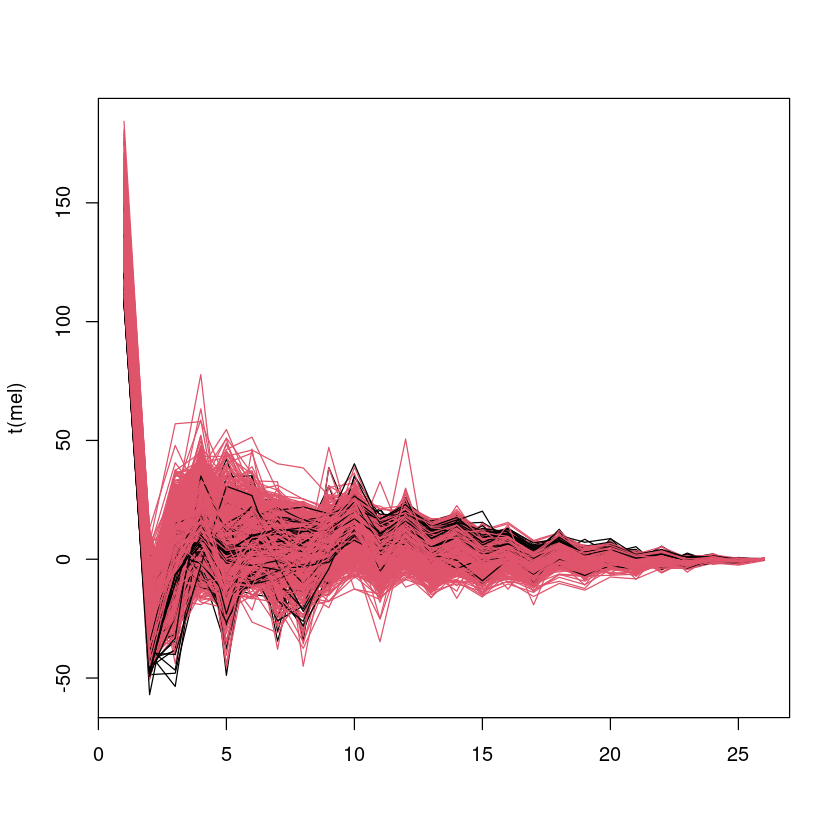

In [145]:
##############################
# MFCC
##############################

if (COMPUTE_MFFC == FALSE) {
  ## if the MFFC is already computed
  mel <- readRDS("mfcc.rds")
} else {
  wl <- 512   # fft length
  ncep <- 26  # number of MFCC
  mel <- matrix(rep(NA, wl / 2), nrow = n, ncol = ncep)

  for(i in 1:n){

    # extract the full path to the audio file
    filename <- paste(DATA_PATH, info$filename[i], sep = "/")
    # read the audio file
    s <- readWave(filename)
    # get the sampling rate
    sr <- s@samp.rate
    # delete the DC offset
    s <- rmoffset(s, output = "Wave")

    # Compute "ncep" MFFC
    mfcc <- melfcc(s,
                  sr = sr,
                  wintime = wl / sr,
                  hoptime = wl / sr,
                  numcep = ncep,
                  nbands = ncep * 2,
                  fbtype = "htkmel",
                  dcttype = "t3",
                  htklifter = TRUE,
                  lifterexp = ncep - 1,
                  frames_in_rows = TRUE,
                  spec_out = FALSE)

    # compute the mean over the whole signal
    mel[i, ] <- apply(mfcc, MARGIN = 2, FUN = mean)

    # release the memory
    rm(s)
    # print message
    print(paste(filename, " computing MFFC ---> Done"))
  }

  # Save the variable
  saveRDS(mel, file="mfcc.rds")

}

# plot all MFCC on a single plot
matplot(t(mel), type = "l", col = info$plane + 1, lty = 1)


In [155]:
##############################
# TRAIN THE ANN MODEL
##############################

# set the seed for reproducibility
set.seed(1234)

# set the confidence threshold to decide
# if the label is 0 or 1 for each label
confidence_threshold <- 0.5

# Target data
target <- cbind(info$plane, info$wind, info$rain, info$biophony, info$silence)
colnames(target) <- c("plane", "wind", "rain", "biophony", "silence")

# Input data
input <- mel
colnames(input) <- seq_len(ncol(input))

# Scaling of the input data
input <- scale(input)

# combine target and input to create the dataset
dataset <- data.frame(target, input)
dataset <- na.omit(dataset) ## remove NA

# split the dataset into training dataset (80%) and test dataset (20%)
index <- sample(seq_len(nrow(dataset)), round(0.80 * nrow(dataset)))
training <- dataset[index, ]
test <- dataset[-index, ]

# ANN on mfcc
ann <- neuralnet(plane+wind+rain+biophony+silence~X1+X2+X3+X4+X5+X6+X7+X8+X9+X10+X11+X12+X13+X12+X13+X14+X15+X16+X17+X18+X19+X20+X21+X22+X23+X24+X25+X26,
                data = training,
                hidden = c(5),
                linear.output = FALSE,
                act.fct = "logistic",
                threshold = 0.1 # default is 0.01
)

## predict on validation
pred <- predict(ann, test)

# convert the result into dataframe
pred <- data.frame(pred)
colnames(pred) <- colnames(target)


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Setting levels: control = 0, case = 1

Setting direction: controls < cases



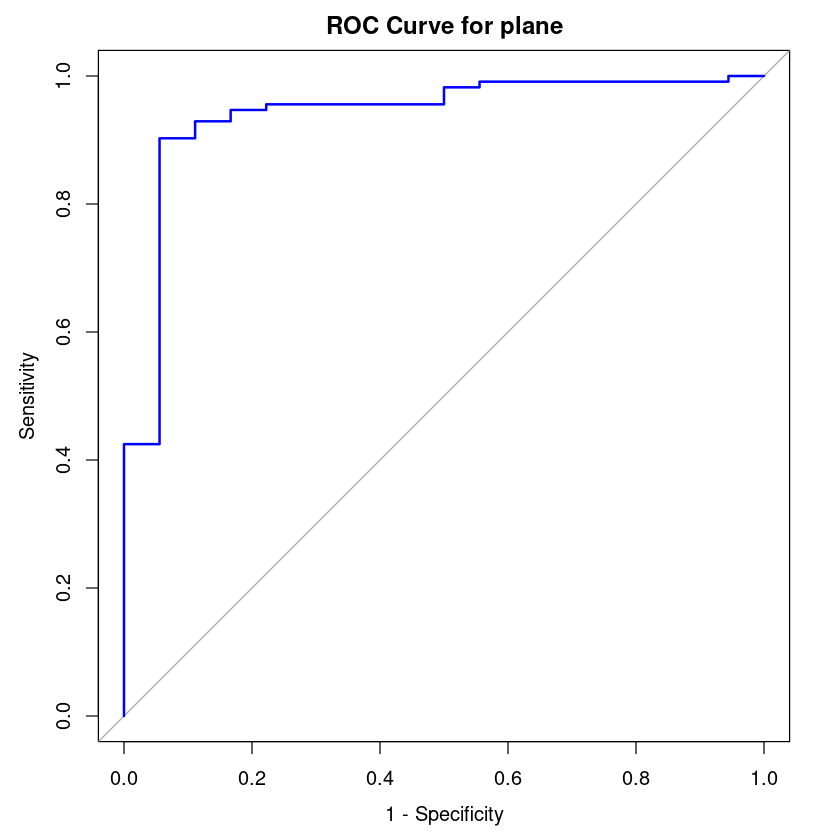

Setting levels: control = 0, case = 1

Setting direction: controls < cases



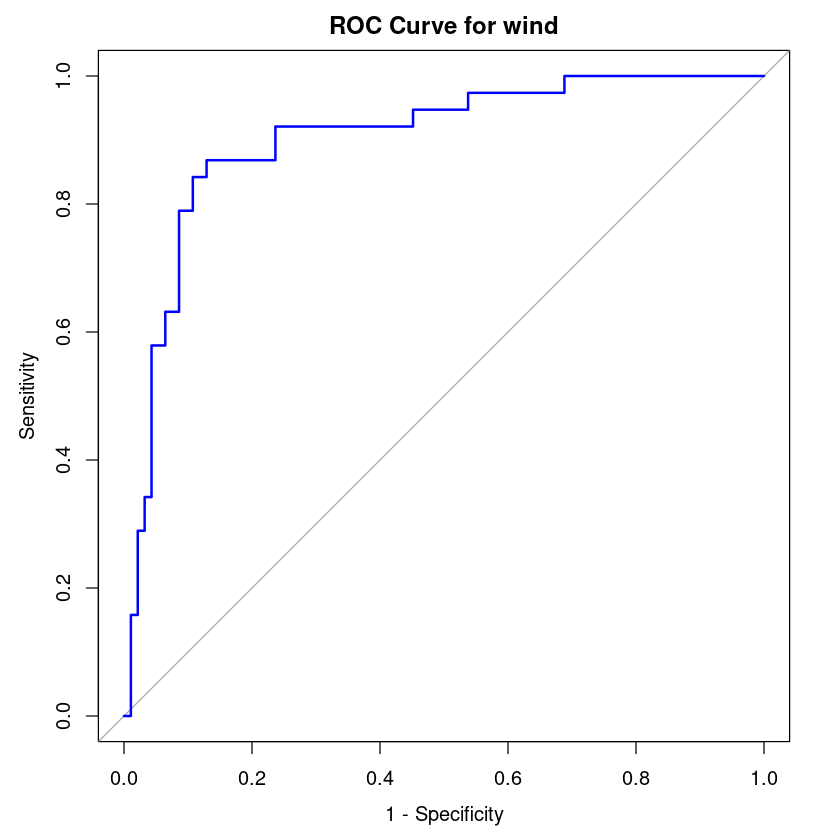

Setting levels: control = 0, case = 1

Setting direction: controls < cases



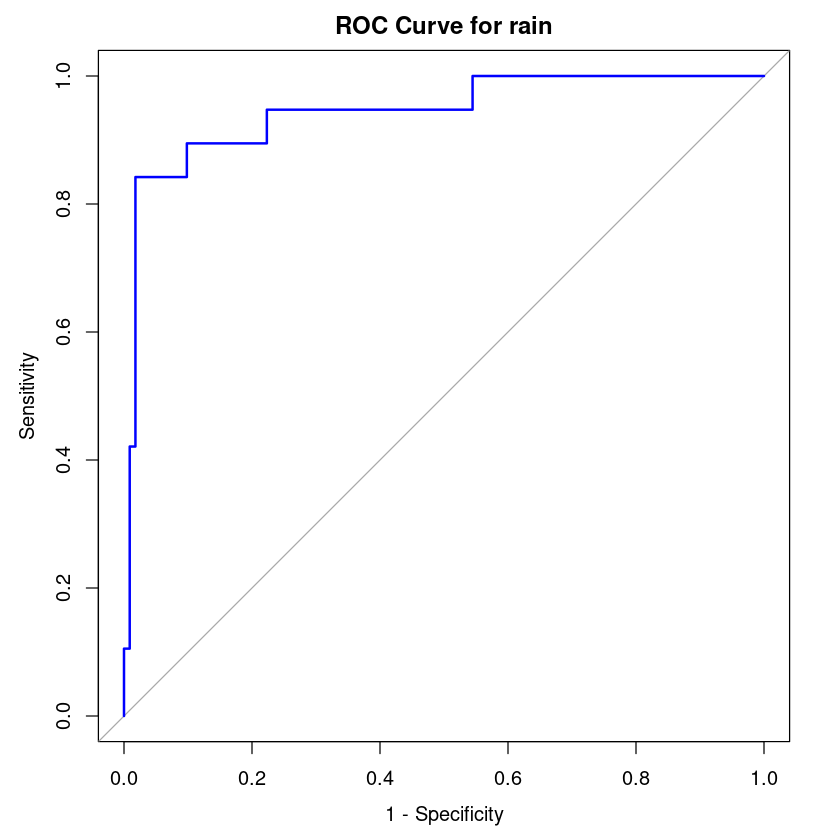

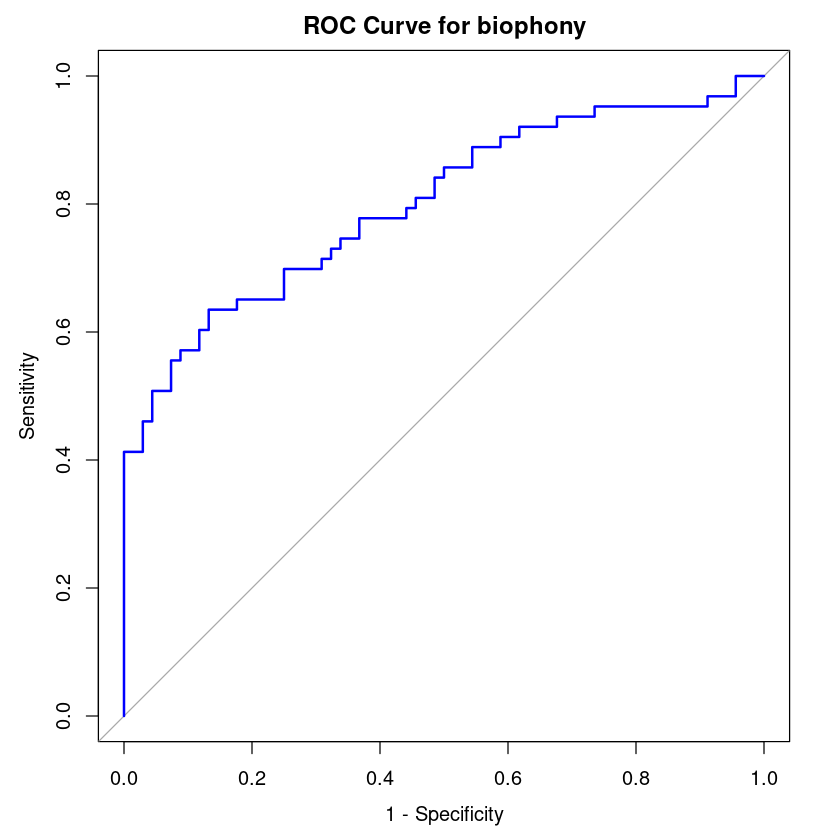

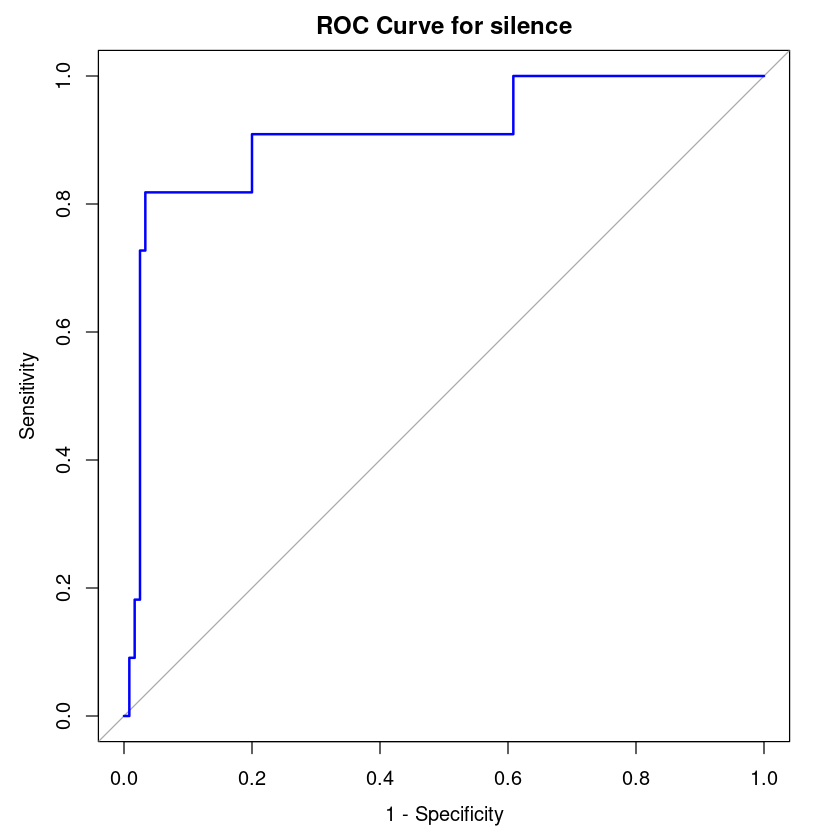

In [156]:
##############################
# DISPLAY THE ROC CURVES
##############################

# ouput initialization
roc_curves <- list()

for (class_name in colnames(target)) {

  # Extract predicted probabilities for the current class
  predicted_probs <- pred[[class_name]]

  # True labels for the current class
  true_labels <- test[[class_name]]

  # Compute ROC curve
  roc_curves[[class_name]] <- roc(true_labels, predicted_probs)

  # Plot ROC curve for each class for the last training dataset
  plot(roc_curves[[class_name]],
      main = paste("ROC Curve for", class_name),
      col = "blue",
      legacy.axes = TRUE)
}

In [157]:
##############################
# DISPLAY THE SCORES
##############################

# ouput initialization
auc_values <- matrix(NA, nrow = 1, ncol = ncol(target))
accuracy <- matrix(NA, nrow = 1, ncol = ncol(target))
recall  <- matrix(NA, nrow = 1, ncol =  ncol(target))
precision <- matrix(NA, nrow = 1, ncol = ncol(target))
fpr <- matrix(NA, nrow = 1, ncol = ncol(target))
tpr <- matrix(NA, nrow = 1, ncol = ncol(target))

colnames(auc_values) <- colnames(target)
colnames(accuracy) <- colnames(target)
colnames(recall) <- colnames(target)
colnames(precision) <- colnames(target)
colnames(fpr) <- colnames(target)
colnames(tpr) <- colnames(target)

for (class_name in colnames(target)) {

  # Extract predicted probabilities for the current class
  predicted_probs <- pred[[class_name]]

  # True labels for the current class
  true_labels <- test[[class_name]]
  
  # Compute the AUC
  auc_values[[class_name]] <- auc(roc(true_labels, predicted_probs))

  # confusion matrix
  pred[[class_name]][pred[[class_name]] > confidence_threshold]  <- 1
  pred[[class_name]][pred[[class_name]] <= confidence_threshold] <- 0

  tab <- table(test[[class_name]], pred[[class_name]])

  tp <- tab[1, 1]
  fp <- tab[2, 1]
  tn <- tab[2, 2]
  fn <- tab[1, 2]

  # accuracy, recall and precision for each class
  accuracy[[class_name]]  <- 100 * (tp + tn) / (tp + tn + fp + fn)
  recall[[class_name]]    <- 100 * tp / (tp + fn)
  precision[[class_name]] <- 100 * tp / (tp + fp)
  tpr[[class_name]]       <- recall[[class_name]]
  fpr[[class_name]]       <- 100 * fp / (tp + fn)

  # print scores
  print(paste("SCORES for",   class_name,
              "AUC",          auc_values[[class_name]],
              "accuracy",     accuracy[[class_name]],
              "recall",       recall[[class_name]],
              "precision",    precision[[class_name]],
              "TPR",          tpr[[class_name]],
              "FPR",          fpr[[class_name]]))
}

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "SCORES for plane AUC 0.939036381514258 accuracy 92.3664122137405 recall 83.3333333333333 precision 68.1818181818182 TPR 83.3333333333333 FPR 38.8888888888889"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "SCORES for wind AUC 0.90096208262592 accuracy 86.2595419847328 recall 89.247311827957 precision 91.2087912087912 TPR 89.247311827957 FPR 8.60215053763441"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "SCORES for rain AUC 0.944078947368421 accuracy 92.3664122137405 recall 93.75 precision 97.2222222222222 TPR 93.75 FPR 2.67857142857143"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "SCORES for biophony AUC 0.800653594771242 accuracy 74.0458015267176 recall 92.6470588235294 precision 68.4782608695652 TPR 92.6470588235294 FPR 42.6470588235294"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "SCORES for silence AUC 0.907575757575758 accuracy 93.1297709923664 recall 97.5 precision 95.1219512195122 TPR 97.5 FPR 5"
